### Name Surname: Ege Arıkan
### ID: 23575 
### Email: egearikan@sabanciuniv.edu

In [1]:
!pip install geopy
!pip install reverse_geocoder
!pip install geocoder
!pip install researchpy

In [2]:
import csv
import numpy as np
import pandas as pd
import reverse_geocoder as rg
import matplotlib.pyplot as plt
import datetime
from geopy.distance import geodesic,great_circle
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns

df=pd.read_csv('taxi-trips.csv') 

# DATA EXPLORATION

## Data types in Dataset

In [3]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Descriptive statistics of Dataset

In [4]:
df.describe() 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


## Shape of Dataset

In [5]:
df.shape

(118185, 11)

## Pickup Districts

In [6]:
pickup=df[['pickup_latitude','pickup_longitude']]
pickup=pickup.apply(tuple, axis=1)
tuples = [tuple(x) for x in pickup.values]
Names_list=[]
result = rg.search(tuples)
for i in range (0,len(result)):
    Names_list.append(result[i]["name"])
    
df["pickup_district"]=Names_list
df.head()

Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


## Dropoff District 

In [7]:
dropoff=df[['dropoff_latitude','dropoff_longitude']]
dropoff=dropoff.apply(tuple, axis=1)
tuples2 = [tuple(x) for x in dropoff.values]
Names_list2=[]
result2 = rg.search(tuples2)
for i in range (0,len(result2)):
    Names_list2.append(result2[i]["name"])
    
df["dropoff_district"]=Names_list2
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


## Pickup Datetime

In [8]:
times=df['pickup_datetime']
newt=[]
for i in range (0,118185):
    str1=times[i]
    str1=str1[11:13]
    p=int(str1)
    if(p<7):
        newt.append('late_night')
    elif( p>=7 and p<9):
        newt.append('rush_hour_morning')
    elif( p>=9 and p<16):
        newt.append('afternoon')
    elif( p>=16 and p<18):
        newt.append('rush_hour_evening')
    elif( p>=18 and p<23):
        newt.append('evening')
    elif( p>=23):
        newt.append('late_night')
    
df['time_of_day']=newt
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,afternoon


## Top 5 district where passengers prefer to leave

In [9]:
pd.value_counts(df['pickup_district'])[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

## Top 5 district where passedngers prefer to arrive

In [10]:
pd.value_counts(df['dropoff_district'])[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

## Distance

In [11]:
#Distance in km
distanceGreatCircle=[]
for i in range (0,len(tuples)):
    distanceGreatCircle.append(geodesic(tuples[i], tuples2[i]).km)
    
df['distance']=distanceGreatCircle
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,time_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,rush_hour_evening,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,evening,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,rush_hour_morning,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,afternoon,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,afternoon,2.513961


## Show how the average distance varies as time of the day changes

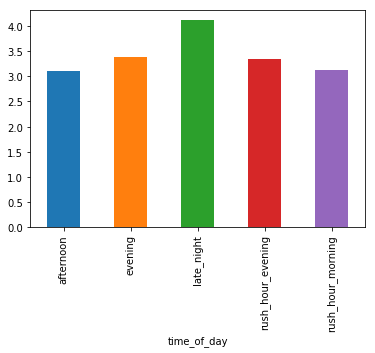

In [12]:
totalDistance=df.groupby('time_of_day')['distance'].sum()/df.groupby('time_of_day')['distance'].count()
totalDistance.plot.bar()

## Show how the trip duration varies as time of the day changes

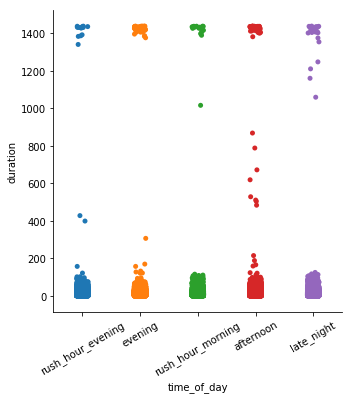

In [15]:
#find the duration for the graph
duration=[]
for i in range(0,118185):
    PickupDate = datetime.datetime.strptime(df['pickup_datetime'][i], '%Y-%m-%d %H:%M:%S')
    DropoffDate= datetime.datetime.strptime(df['dropoff_datetime'][i], '%Y-%m-%d %H:%M:%S')
    DurationInTime=DropoffDate-PickupDate
    DurationInMin=DurationInTime.total_seconds()/60
    duration.append(DurationInMin)

df['duration']=duration   
DurationWithTimeofDay=df[["duration","time_of_day"]]
DurationWithTimeofDay.to_csv('temp1.csv', mode='a', header=True)
census_data = pd.read_csv('temp1.csv')

g=sns.catplot(x="time_of_day",y="duration",data=census_data)
g.set_xticklabels(rotation=30)

# HYPOTHESIS TESTING

## 1-Does passenger group size affect the distance?
### Null hypothesis: Passenger group size has no effect on the distance 
### $$\bar x_{P0}=\bar x_{P1}=\bar x_{P2}=\bar x_{P3}=\bar x_{P4}=\bar x_{P5}=\bar x_{P6} $$
### Alternative hypothesis: Passenger group size has effect on the distance
### $$\bar x_{P0}\neq\bar x_{P1}\neq\bar x_{P2}\neq\bar x_{P3}\neq\bar x_{P4}\neq\bar x_{P5}\neq\bar x_{P6} $$

In [16]:
#T-test for two sample applied
das=[]
for i in range(0,118185):
    if df['passenger_count'][i]==1 :
        das.append(1)
    elif df['passenger_count'][i]>1 or df['passenger_count'][i]==0:
        das.append(2)
        
df["passengertype"]=das
ert1=df[df["passengertype"] == 1]["distance"]
ert2=df[df["passengertype"] == 2]["distance"]
stats.ttest_ind(ert1, ert2, equal_var=False)

Ttest_indResult(statistic=-4.901086885647343, pvalue=9.555133481557072e-07)

Result:Before the test we can observe there are 7 types of passenger sizes (from 0 to 6, both included) and we need to convert them into 2 samples where these are passenger size with 1 and others. After the conversion we can group them with their distance. From the T-test we conduct the P value as 9.555133481557072e-07 where it is much smaller than the significance level which is 0.05. Since pvalue of this test is smaller than 0.05 we can reject our null hypothesis. Test score is negative which indicates that mean of distance covered with "1 passenger" does not equal to mean of distance covered with "0,2,3,4,5,6 passengers" where the mean of distance covered with 1 passenger is smaller. 

## 2-Do trip distances increase in weekends?
### Null hypothesis: The day of the week has no effect on the distance
### $$\bar x_{WeekDays}=\bar x_{WeekEnds} $$
### Alternative hypothesis: The day of the week has effect on the distance
### $$\bar x_{WeekDays}\neq\bar x_{WeekEnds} $$

In [17]:
#T-test for two sample 
daytype=[]
for i in range(0,118185):
    PickupDate = datetime.datetime.strptime(df['pickup_datetime'][i], '%Y-%m-%d %H:%M:%S')
    if PickupDate.strftime("%A")=="Monday" or PickupDate.strftime("%A")=="Tuesday" or PickupDate.strftime("%A")=="Wednesday" or PickupDate.strftime("%A")=="Thursday" or PickupDate.strftime("%A")=="Friday":
        daytype.append("weekday")
    else:
        daytype.append("weekend")
        
df["Day_of_week"]=daytype
ert3=df[df["Day_of_week"] == "weekday"]["distance"]
ert4=df[df["Day_of_week"] == "weekend"]["distance"]
stats.ttest_ind(ert4, ert3, equal_var=False)

Ttest_indResult(statistic=5.604877366928609, pvalue=2.092414433069292e-08)

Result: Before the test we need to first identify the day, if it is Weekend or not. After we identify each day in dataset we can group them according to this information where we have 2 different options for each data(Weekend or Weekday). From the T-test we conduct the P value as 2.092414433069292e-08 where it is much smaller than the significance level which is 0.05. Since pvalue of this test is smaller than 0.05 we can reject our null hypothesis. Test score is positive which indicates that mean of distance covered in "Weekday" does not equal to mean of distance covered in "Weekend" where the mean of distance covered in "Weekday" is bigger. 